In [1]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
class Args:
    def __init__(self):
        self.log_root = 'log'
        self.incremental = True # If true we don't retrain the model every step
        self.dataset = 'ackley' # This is branin or ackley or hartmann24
        self.use_val = False
        
        self.re_calib = False
        self.re_bias_f = False
        self.re_bias_y = False

        # Modeling parameters
        self.model = 'small'
        self.learning_rate = 1e-3
        self.num_bins = 0
        self.knn = 10

        # Run related parameters
        self.num_iter = 1000
        self.run_label = 0
        self.num_run = 10
        self.flow_skip = 1

20
18
19
25
25
25
34
32
35


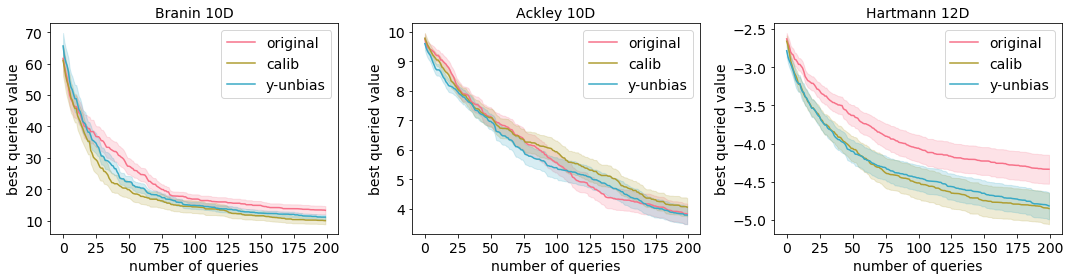

In [63]:
palette = np.array(sns.color_palette('husl', 5))[[0, 1, 3]]

fontsize=14
plt.figure(figsize=(15, 4))
names = ['none', 'calib', 'y-bias']
titles = ['original', 'calib', 'y-unbias']
dtitles = ['Branin 10D', 'Ackley 10D', 'Hartmann 12D']
for didx, dataset in enumerate(['branin10', 'ackley', 'hartmann12']):
    plt.subplot(1, len(dtitles), didx+1)
    for rep in range(3):
        result_arr = []
        for run_label in range(0, 40):
            args = Args()
            args.dataset = dataset
            args.run_label = run_label
            if rep == 1:
                args.re_calib = True
            if rep == 2:
                args.re_bias_y = True
            if rep == 0:
                args.use_val = False
            args.name = '%s/model=%s-%r-%r-%r-%r-%r-bin=%d-%d-run=%d' % \
                (args.dataset, args.model, args.incremental, args.use_val, args.re_calib, args.re_bias_f, args.re_bias_y, args.num_bins, args.knn, args.run_label)
            args.log_dir = os.path.join(args.log_root, args.name)

            try:
                reader = open(os.path.join(args.log_dir, 'results.txt'))
            except:
                continue
            line = reader.readline().split()
            if len(line) < 300:
                continue
            if line[0][0:5] == 'Start':
                line[0] = line[0][5:]

            ys = [float(item) for item in line]
            min_y = [ys[0]]
            for y in ys[1:]:
                if y < min_y[-1]:
                    min_y.append(y)
                else:
                    min_y.append(min_y[-1])
            result_arr.append(np.array(min_y))
        print(len(result_arr))
        if len(result_arr) == 0:
            continue
        result_arr = np.stack(result_arr)
        mean = np.mean(result_arr[:, 100:], axis=0)
        std = result_arr[:, 100:].std(axis=0) / np.sqrt(result_arr.shape[0]-1)
        plt.plot(range(200), mean, c=palette[rep], label=titles[rep])
        plt.fill_between(range(200), mean-std, mean+std, color=palette[rep], alpha=0.2)
        plt.xlabel('number of queries', fontsize=fontsize)
        plt.ylabel('best queried value', fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.title(dtitles[didx], fontsize=fontsize)
plt.tight_layout()
plt.savefig('bo_all.png')
plt.show()


In [ ]:
plt.show()